In [1]:
from utils import *
from dataset import *
from autoencoder import *
import pandas as pd

Ashley = False
if Ashley:
    device = "cpu"
else:
    device = "cuda"

In [26]:
#### Load true and false flares data
# Load dataframes
true_flares_df = pd.read_csv('Chandra_data/trueflares.csv')
false_flares_df = pd.read_csv('Chandra_data/falseflares.csv')
true_flares_df = true_flares_df[['time','energy','obsreg_id']]
false_flares_df = false_flares_df[['time','energy','obsreg_id']]

# Convert to data dictionary
true_dict = true_flares_df.groupby('obsreg_id').apply(lambda group: np.array(group[['time', 'energy']])).to_dict()
false_dict = false_flares_df.groupby('obsreg_id').apply(lambda group: np.array(group[['time', 'energy']])).to_dict()

In [27]:
#### Visualize summary distributions
true_lengths = np.array([len(true_dict[k]) for k in true_dict.keys()])
true_Ts = np.array([max(true_dict[k][:,0])-min(true_dict[k][:,0]) for k in true_dict.keys()])
false_lengths = np.array([len(false_dict[k]) for k in false_dict.keys()])
false_Ts = np.array([max(false_dict[k][:,0])-min(false_dict[k][:,0]) for k in false_dict.keys()])

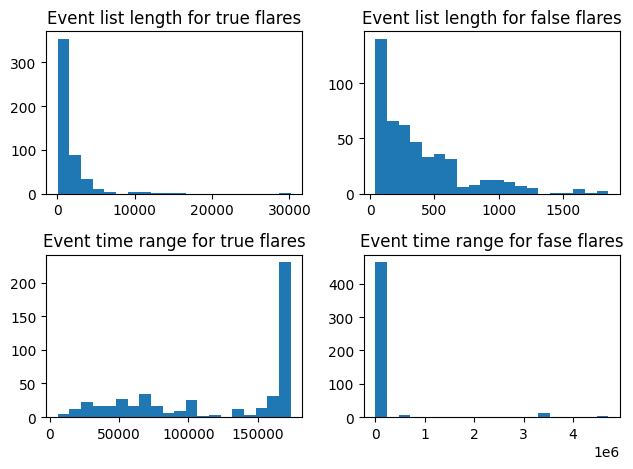

In [28]:
fig, ax = plt.subplots(2,2)

ax[0,0].hist(true_lengths,bins=20);
ax[0,0].set_title('Event list length for true flares')

ax[0,1].hist(false_lengths,bins=20);
ax[0,1].set_title('Event list length for false flares')

ax[1,0].hist(true_Ts,bins=20);
ax[1,0].set_title('Event time range for true flares')

ax[1,1].hist(false_Ts,bins=20);
ax[1,1].set_title('Event time range for fase flares')
plt.tight_layout()

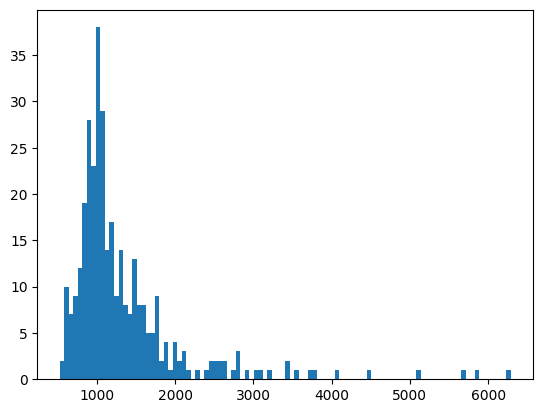

In [71]:
ind = 6
dic = false_dict
event_list = dic[list(dic.keys())[ind]]
# event_list = event_list[:,1] - min(event_list[:,0])
plt.hist(event_list[:,1],bins=100);

In [53]:
len(false_dict)

485